In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# The hdf5 data file

This notebook provides examples for accessing data within an oskar hdf5 datafile.

In [3]:
from e11 import run_file, H5Scan, H5Data

`run_file()`  
    - A function that generates the path to the data file using the run ID and base directory.

`H5Scan`
    - Access datasets in hdf5 files without groups.

`H5Data`  
    - Access datasets in hdf5 data files with numbered groups.

Normally, the datafiles files would be saved in a timestamp structure and each can be found using the `rid`.  The path to the file can then be built using `run_file`.

``` python
>>> fil = run_file(base="Q:\E11_atmos\data", rid='20171127_155753')
```

But for the examples below we'll use the example data.

## H5Scan

`H5Scan` provides a very simple interface for files which only contain datasets (no groups).

In [4]:
import os 
fil = os.path.join(os.getcwd(), 'example_data', 'microwave_scan.h5')
scan = H5Scan(fil)
# root attributes
scan.attrs()

{'option': '',
 'run_ID': '20180205_161148',
 'timestamp': '2018-02-05 16:11:48',
 'var': 'microwaves (GHz)'}

### Datasets
To list the datasets found in the file, 

In [5]:
scan.datasets

['analysis', 'osc_0']

Or to get the attributes associated with a dataset

In [6]:
scan.attrs('analysis')

{'A': 2.104375e-07,
 'B': 2.775e-08,
 'C': 5.018125e-07,
 'D': 4.85625e-07,
 'E': 5.480625e-07,
 'F': 9.041875e-07,
 'a0 ': (0, 0, 1),
 'a1': (0, 1, 1),
 'a2': (0, 2, 0),
 'f': 'a1- a0'}

Datasets can be accessed using `h5.array()`, for array data, or `h5.df()` for DataFrame data, e.g., 

In [7]:
scan.array('osc_0')

array([[ 0.00052656,  0.00054219,  0.00054219, ..., -0.00243437,
        -0.00242656, -0.00244219],
       [ 0.00046406,  0.00047188,  0.00046406, ..., -0.00259844,
        -0.00259063, -0.00261406],
       [ 0.00046406,  0.00045625,  0.00044063, ..., -0.00248125,
        -0.00250469, -0.00249688],
       ...,
       [-0.00014531, -0.00014531, -0.00016094, ..., -0.00309844,
        -0.00309063, -0.00308281],
       [ 0.00047188,  0.00046406,  0.0004875 , ..., -0.00249688,
        -0.0025125 , -0.0025125 ],
       [ 0.00058125,  0.00056563,  0.00055781, ..., -0.00258281,
        -0.00258281, -0.00256719]])

In [8]:
scan.df('analysis').head()

,var,w0,w1,a0,a1,a2,f
measurement,,,,,,,
0,32.0500,777.950119,786.992730,0.000499,-0.005882,-1.118270,-0.006381
1,32.0505,777.950119,786.992729,0.000458,-0.006048,-1.122989,-0.006506
2,32.0510,777.950120,786.992729,0.000443,-0.005974,-1.138911,-0.006417
3,32.0515,777.950119,786.992729,0.000860,-0.005568,-0.995466,-0.006428
4,32.0520,777.950119,786.992729,0.000522,-0.005977,-1.095825,-0.006499


See `2)_Raw_datasets.ipynb` for further examples.

## H5Data

`H5Data` is for accessing datasets inside a single level of numbered groups.  

In [9]:
fil = os.path.join(os.getcwd(), 'example_data', 'laser_data.h5')
data = H5Data(fil)
data.pprint()

file: 		 C:\Users\Adam\Documents\Git\e11_analysis\notebooks\example_data\laser_data.h5 
size: 		 0.35 MB 
num groups: 	 64 
author: 	 AD 
description: 	 Linear up-down scan of DL pro 711 nm


Here, `data` is an instance of the H5Data class.  

A `pandas.DataFrame` of the attributes of each group can be accessed as `data.log`. This can be rebuilt at any time using `data.update_log()`.

In [10]:
# In our case building the log doesn't take very long.
%time data.update_log()

100%|█████████████████████████████████████████████████████████████████████████████████| 64/64 [00:00<00:00, 842.65it/s]


Wall time: 92.9 ms


In [11]:
# log output
data.log.head()

,ACQUIRE,DATETIME,END,ERROR,LOOP,OVERRIDE,REC:WLM?1,REC:WLM?2,START,VAR:WL?1,ELAPSED
squid,,,,,,,,,,,
1,10.017976,2017-12-01 16:31:44,3.594991e+09,0,1,0,632.991062,711.460801,3.594991e+09,711.4608,00:00:00
2,10.012825,2017-12-01 16:31:57,3.594991e+09,0,1,0,632.991062,711.460900,3.594991e+09,711.4609,00:00:13
3,10.015001,2017-12-01 16:32:10,3.594991e+09,0,1,0,632.991062,711.461001,3.594991e+09,711.4610,00:00:26
4,10.012057,2017-12-01 16:32:23,3.594991e+09,0,1,0,632.991062,711.461101,3.594991e+09,711.4611,00:00:39
5,10.021376,2017-12-01 16:32:37,3.594991e+09,0,1,0,632.991062,711.461201,3.594991e+09,711.4612,00:00:53


Experimental settings are stored in the log file as VARS and measurements as RECS.

In [12]:
from e11.tools import add_level

In [13]:
# combine VAR and REC data
df = add_level(data.var, 'VAR').join(add_level(data.rec, 'REC'))
df.head()

VAR         REC            
           WL?1       WLM?1       WLM?2
squid                                  
1      711.4608  632.991062  711.460801
2      711.4609  632.991062  711.460900
3      711.4610  632.991062  711.461001
4      711.4611  632.991062  711.461101
5      711.4612  632.991062  711.461201

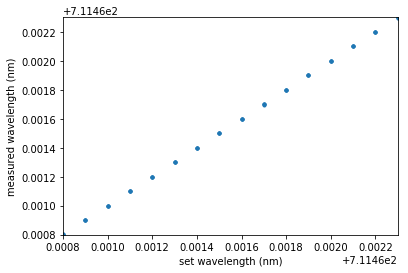

In [14]:
# plot
fig, ax = plt.subplots()

# data
xvals = df[('VAR', 'WL?1')]    # laser wavelength PID reference
yvals = df[('REC', 'WLM?2')]   # measured wavelength
ax.scatter(xvals, yvals, marker='.')

# format
ax.set_xlim([xvals.min(), xvals.max()])
ax.set_ylim([yvals.min(), yvals.max()])
ax.set_xlabel('set wavelength (nm)')
ax.set_ylabel('measured wavelength (nm)')

# output
plt.show()

### Groups

The datasets are distributed within groups. Each group represents one configuration of experimental variables (VARS), and they are numbered sequentually by the `squid`.

In [15]:
print(data.squids)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]


To discover the settings relating to a particular group check the log,

In [16]:
squid = 1
data.log.loc[squid]

ACQUIRE                   10.018
DATETIME     2017-12-01 16:31:44
END                  3.59499e+09
ERROR                          0
LOOP                           1
OVERRIDE                       0
REC:WLM?1                632.991
REC:WLM?2                711.461
START                3.59499e+09
VAR:WL?1                 711.461
ELAPSED          0 days 00:00:00
Name: 1, dtype: object

Or simularly,

In [17]:
data.attrs(squid)

{'ACQUIRE': 10.0179762840271,
 'DATETIME': '2017-12-01 16:31:44',
 'END': 3594990714.6577516,
 'ERROR': 0,
 'LOOP': 1,
 'OVERRIDE': 0,
 'REC:WLM?1': 632.9910617145752,
 'REC:WLM?2': 711.4608014137556,
 'SQUID': 1,
 'START': 3594990704.6397753,
 'VAR:WL?1': 711.4608}

### Datasets

To list the datasets in a particular group,

In [18]:
squid = 1
print(data.datasets(squid))

['WLM']


Or to see the attributes of a particular dataset

In [19]:
data.attrs(squid, 'WLM')

{'active channels': 'ch1,ch2',
 'refresh (ms)': 500,
 'squid': 1,
 'type': 7,
 'version': 1767}

See 'Raw datasets.ipynb' for examples for how to access the data within different types of hdf5 dataset.